## Import Packages

In [1]:
#Import Packages
import pickle

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

Using TensorFlow backend.


## Read Dataset

In [2]:
#Read Dataset
data = pd.read_csv('Train SemEval 2015 Task 12.csv')
test = pd.read_csv('Test SemEval 2015 Task 12.csv')
data1 = pd.read_csv('Train extended.csv')
data1

,sentences/sentence/0/text,sentences/sentence/0/_id,sentences,aspects,polarity,sentences/sentence/1/_id,sentences.1,aspects.1,polarity.1,sentences/sentence/2/_id,...,sentences/sentence/7/Opinions/Opinion/2/_polarity,sentences/sentence/16/_OutOfScope,sentences/sentence/20/_OutOfScope,sentences/sentence/17/_OutOfScope,sentences/sentence/9/Opinions/Opinion/2/_category,sentences/sentence/9/Opinions/Opinion/2/_polarity,sentences/sentence/11/_OutOfScope,sentences/sentence/14/_OutOfScope,sentences/sentence/2/Opinions/Opinion/4/_category,sentences/sentence/2/Opinions/Opinion/4/_polarity
0,Being a PC user my whole life....,79:00:00,This computer is absolutely AMAZING!!!,LAPTOP#GENERAL,positive,79:01:00,10 plus hours of battery...,BATTERY#OPERATION_PERFORMANCE,positive,79:02:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,the laptop was really good and it goes really ...,10:00,i would really recommend to any person out the...,LAPTOP#GENERAL,positive,10:01,and its really cheap and you wont regret buyin...,LAPTOP#PRICE,positive,10:02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"As a lifelong Windows user, I was extremely pl...",264:00:00,"As a computer science student in college, I fi...",LAPTOP#PORTABILITY,positive,264:01:00,without a big ol' clunky machine in my backpac...,LAPTOP#DESIGN_FEATURES,positive,264:02:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oh my goodness-I am not a happy camper.,24:00:00,My HP is very heavy.,LAPTOP#DESIGN_FEATURES,negative,24:01:00,Not easy to carry.,LAPTOP#PORTABILITY,negative,24:02:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Since I purchased my Toshiba netbook, I have b...",277:00:00,The netbook is easier for me to take to bed an...,LAPTOP#PORTABILITY,positive,277:01:00,"The screen takes some getting use to, because ...",DISPLAY#USABILITY,neutral,277:02:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,This laptop is amazing!,B00KB3MXH4_22_A106YGESUYA4BP:0,Windows 8.1 has its pros and cons.,OS#GENERAL,neutral,B00KB3MXH4_22_A106YGESUYA4BP:1,The keyboard is backlit but you have to press ...,KEYBOARD#DESIGN_FEATURES,positive,B00KB3MXH4_22_A106YGESUYA4BP:2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,The HP Envy 15 has been everything I expected.,B00D7Z84OY_46_A1P70MSK0HHO7K:0,After doing much research for a laptop that ha...,LAPTOP#DESIGN_FEATURES,positive,B00D7Z84OY_46_A1P70MSK0HHO7K:1,Amazon had the best pricing and the delivery w...,NaN,NaN,B00D7Z84OY_46_A1P70MSK0HHO7K:2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,used 6 times black screen returned for refund,B00KMRGF28_304_A35Q7MBKQZV1SA:0,do not use the facial recognition,SOFTWARE#GENERAL,negative,B00KMRGF28_304_A35Q7MBKQZV1SA:1,Windows 8 is not supported by a lot of things!,OS#USABILITY,negative,B00KMRGF28_304_A35Q7MBKQZV1SA:2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,"The Dell is quick enough, sturdy, not good wit...",B00KMRGF28_143_A2F0D5EV8ZOK44:0,It does what it advertises.,LAPTOP#GENERAL,positive,B00KMRGF28_143_A2F0D5EV8ZOK44:1,"Price is great, wish it didn't have Windows 8,...",LAPTOP#PRICE,positive,B00KMRGF28_143_A2F0D5EV8ZOK44:2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Reviews and Aspect Labels

In [4]:
#Reviews and Aspect Labels
train_sen1 = data.iloc[:,0]
train_sen2 = data.iloc[:,3]
train_sen3 = data.iloc[:,6]
train_sen4 = data1.iloc[:,2]
train_sen5 = data1.iloc[:,6]
test_sen = test.iloc[:,10]
test_aspect = test.iloc[:,11]
aspect_sen1 = data.iloc[:,1]
aspect_sen2 = data.iloc[:,4]
aspect_sen3 = data.iloc[:,7]
aspect_sen4 = data1.iloc[:,3]
aspect_sen5 = data1.iloc[:,7]
aspect_sen = aspect_sen1.append(aspect_sen2)
aspect_sen = aspect_sen.append(aspect_sen3)
aspect_sen = aspect_sen.append(aspect_sen4)
aspect_sen = aspect_sen.append(aspect_sen5)
aspects = aspect_sen.append(test_aspect)
train_sen = train_sen1.append(train_sen2)
train_sen = train_sen.append(train_sen3)
train_sen = train_sen.append(train_sen4)
train_sen = train_sen.append(train_sen5)
train_sen = train_sen.astype(str)
test_sen = test_sen.astype(str)
aspects = aspects.astype(str)
from sklearn import preprocessing
pre1 = preprocessing.LabelEncoder()
aspects = pre1.fit_transform(aspects)
aspects_train = aspects[:1731]
aspects_test = aspects[1731:]
aspects_train = np.asarray(aspects_train)
aspects_test = np.asarray(aspects_test)
aspects_test

array([25, 28, 60, 60, 60, 26, 21, 25, 25, 43, 60,  8, 23, 60, 28, 60, 60,
       60, 29, 23, 23, 60, 60, 60, 24, 60, 60, 23, 23, 60, 60, 58, 23, 23,
       24, 22, 21, 24, 60, 17, 60, 24, 60, 17, 60, 60, 60,  4, 22, 60, 22,
       60, 60, 25,  2, 60, 60, 24, 60, 60, 21, 28, 60, 60, 60, 22,  8, 22,
        7, 22, 60, 60, 23, 60, 60, 23, 40, 25, 60, 60, 60, 60, 60, 60, 60,
       25, 23, 60, 60, 23,  6, 60, 60, 60, 10, 23, 25, 24, 24, 25, 23, 40,
       60, 60, 25, 60, 25, 23, 22, 28,  2, 40,  2, 58,  0, 35, 29, 60, 29,
       18, 22, 22, 60, 60, 60, 60, 60, 60, 60, 23, 60, 60,  8, 25, 25, 60,
       50, 60, 24, 60, 60, 60, 60, 28, 25, 60,  4, 34,  1, 25, 25, 60, 29,
       23, 18, 60, 21, 43, 24, 22, 56, 47, 60, 10, 23, 60, 43, 60, 17, 60,
       47, 27, 60])

## Tokenization

In [5]:
#Tokenization 
tokenizer = Tokenizer(num_words=2100, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sen)
w_i = tokenizer.word_index
print(w_i)

{'<OOV>': 1, 'the': 2, 'i': 3, 'it': 4, 'and': 5, 'to': 6, 'a': 7, 'is': 8, 'for': 9, 'of': 10, 'this': 11, 'my': 12, 'have': 13, 'laptop': 14, 'that': 15, 'with': 16, 'computer': 17, 'was': 18, 'not': 19, 'in': 20, 'nan': 21, 'on': 22, 'very': 23, 'but': 24, 'use': 25, 'great': 26, 'had': 27, 'so': 28, 'you': 29, 'has': 30, 'as': 31, 'one': 32, 'all': 33, 'easy': 34, 'me': 35, 'only': 36, 'battery': 37, 'good': 38, 'just': 39, 'bought': 40, 'up': 41, 'be': 42, 'after': 43, 'do': 44, 'are': 45, 'macbook': 46, 'love': 47, 'its': 48, 'well': 49, 'no': 50, 'screen': 51, 'more': 52, 'am': 53, "it's": 54, 'life': 55, 'toshiba': 56, 'like': 57, 'about': 58, 'mac': 59, 'from': 60, 'get': 61, 'than': 62, 'would': 63, 'time': 64, 'really': 65, 'windows': 66, 'first': 67, 'pro': 68, 'or': 69, 'out': 70, 'they': 71, 'everything': 72, 'product': 73, 'price': 74, 'can': 75, 'at': 76, 'any': 77, 'pc': 78, 'work': 79, 'will': 80, '2': 81, 'an': 82, 'quality': 83, 'when': 84, 'months': 85, 'keyboard':

## Save and Load Tokenizer

In [ ]:
# saving tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# loading tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

## Save and Load Encoder for Aspect Categorization

In [ ]:
# saving aspects encoder
with open('aspects_encoder.pickle', 'wb') as handle:
    pickle.dump(pre1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# loading aspects encoder
with open('aspects_encoder.pickle', 'rb') as handle:
    aspects_encoder = pickle.load(handle)

## Sequencing

In [6]:
#Sequencing 
seq_train = tokenizer.texts_to_sequences(train_sen)
seq_test = tokenizer.texts_to_sequences(test_sen)
print(seq_test)

[[1963, 41, 476, 945, 9, 1964], [24, 88, 29, 99, 11, 3, 63, 1535, 258, 15, 29, 99, 7, 400, 5, 51, 1521, 9, 11, 102, 31, 71, 45, 1965, 6, 42, 317, 1966], [21], [2, 357, 1536, 226, 478, 4, 7, 409, 590, 62, 467, 46, 68, 575, 15, 116, 7, 1967, 93, 94], [21], [3, 75, 25, 4, 388], [1968, 454, 22, 2, 421, 718, 752, 124, 111, 130, 302, 6, 61, 6, 2, 1969, 10], [128, 23, 49], [92, 186, 9, 12, 911], [2, 273, 224, 16, 11, 18, 66, 119], [21], [2, 539, 165, 8, 639], [8, 39, 160], [21], [1537, 57, 357, 1536], [21], [21], [21], [3, 512, 118, 671, 1970, 22, 4], [148], [54, 19, 89, 29, 802, 9], [21], [21], [21], [1971, 1972, 138, 1973], [21], [21], [2, 36, 836, 3, 300, 485, 4, 7, 183, 1538, 8, 3, 241, 3, 13, 6, 920, 28, 194, 6, 456, 22, 2, 210, 447], [38, 73, 9, 7, 38, 74], [21], [3, 344, 101, 99, 7, 17, 411, 933, 205, 931, 9, 584], [71, 145, 169, 6, 1528, 221, 434, 5, 870, 221, 1974, 107, 229, 221, 1975, 2, 349, 163], [71, 546, 4], [63, 19, 258], [98, 487, 6, 25, 6, 289, 77, 78, 187, 69, 455], [12, 197

## Padding

In [7]:
#Padding
pad_train = pad_sequences(seq_train, padding='post',maxlen=100)
pad_test = pad_sequences(seq_test, padding='post',maxlen=100)
print(pad_test)

[[1963   41  476 ...    0    0    0]
 [  24   88   29 ...    0    0    0]
 [  21    0    0 ...    0    0    0]
 ...
 [  66  239    8 ...    0    0    0]
 [  74    8   26 ...    0    0    0]
 [  21    0    0 ...    0    0    0]]


## Sentiment Labels

In [8]:
#Sentiment Labels
lab_train1 = data.iloc[:,2]
lab_train2 = data.iloc[:,5]
lab_train3 = data.iloc[:,8]
lab_train4 = data1.iloc[:,4]
lab_train5 = data1.iloc[:,8]
lab_train = lab_train1.append(lab_train2)
lab_train = lab_train.append(lab_train3)
lab_train = lab_train.append(lab_train4)
lab_train = lab_train.append(lab_train5)
lab_test = test.iloc[:,12]
labs = lab_train.append(lab_test)
lab_train = lab_train.astype(str)
lab_test = lab_test.astype(str)
labs = labs.astype(str)
pre2 = preprocessing.LabelEncoder()
labs = pre2.fit_transform(labs)
labs_train = labs[:1731]
labs_test = labs[1731:]
labs_train = np.asarray(labs_train)
labs_test = np.asarray(labs_test)
labs_test

array([1, 1, 0, 0, 0, 3, 1, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 1, 3, 1, 0,
       0, 0, 1, 0, 0, 3, 3, 0, 0, 3, 3, 1, 1, 1, 1, 1, 0, 1, 0, 3, 0, 3,
       0, 0, 0, 1, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 1,
       3, 3, 3, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0,
       0, 3, 1, 0, 0, 0, 3, 1, 3, 3, 1, 1, 3, 3, 0, 0, 3, 0, 2, 3, 1, 3,
       3, 3, 3, 1, 1, 1, 3, 0, 1, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       3, 1, 1, 0, 1, 0, 3, 0, 0, 0, 0, 3, 1, 0, 1, 1, 1, 3, 1, 0, 2, 1,
       3, 0, 2, 3, 3, 1, 1, 1, 0, 3, 3, 0, 1, 0, 3, 0, 1, 3, 0])

## Save and Load Encoder for Sentiment Classification

In [ ]:
# saving sentiments encoder
with open('sentiments_encoder.pickle', 'wb') as handle:
    pickle.dump(pre2, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# loading aspects encoder
with open('sentiments_encoder.pickle', 'rb') as handle:
    sentiments_encoder = pickle.load(handle)

## Model for Aspect Categorization

In [26]:

#Model1 for Aspect Categorization - GRU
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(2100,24, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(24,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(12)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(61,activation='softmax')
])
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 24)           50400     
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 100, 48)           7200      
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 24)                4464      
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 150       
_________________________________________________________________
dense_17 (Dense)             (None, 61)                427       
Total params: 62,641
Trainable params: 62,641
Non-trainable params: 0
_________________________________________________________________


## Model for Sentiment Classification

In [27]:
#Model2 for Sentiment Classification - GRU
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(2100,8, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(8,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(4)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 8)            16800     
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 100, 16)           864       
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 8)                 528       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 20        
Total params: 18,248
Trainable params: 18,248
Non-trainable params: 0
_________________________________________________________________


## Train, Evaluate and Predict

In [28]:
#Training and Prediction of Model1
epoch1 = 65
history1 = model1.fit(pad_train, aspects_train, epochs=epoch1, validation_data=(pad_test,aspects_test))
pred1 = model1.predict(pad_test)
aspects_pred = pred1.argmax(axis=-1)
print(pre1.inverse_transform(aspects_pred))
print(pre1.inverse_transform(aspects_test))

Train on 1731 samples, validate on 173 samples
Epoch 1/65
1731/1731 [==============================] - 18s 10ms/sample - loss: 3.9257 - accuracy: 0.1594 - val_loss: 3.5231 - val_accuracy: 0.0983
Epoch 2/65
1731/1731 [==============================] - 7s 4ms/sample - loss: 3.2914 - accuracy: 0.1681 - val_loss: 2.6988 - val_accuracy: 0.0983
Epoch 3/65
1731/1731 [==============================] - 7s 4ms/sample - loss: 2.7897 - accuracy: 0.2640 - val_loss: 2.3044 - val_accuracy: 0.4162
Epoch 4/65
1731/1731 [==============================] - 7s 4ms/sample - loss: 2.5371 - accuracy: 0.2617 - val_loss: 2.1422 - val_accuracy: 0.4162
Epoch 5/65
1731/1731 [==============================] - 7s 4ms/sample - loss: 2.3384 - accuracy: 0.2860 - val_loss: 1.9650 - val_accuracy: 0.4566
Epoch 6/65
1731/1731 [==============================] - 8s 5ms/sample - loss: 2.1776 - accuracy: 0.3559 - val_loss: 1.8266 - val_accuracy: 0.5318
Epoch 7/65
1731/1731 [==============================] - 7s 4ms/sample - los

In [29]:
#Training and Prediction for Model2
epoch2 = 20
history2 = model2.fit(pad_train, labs_train, epochs=epoch2, validation_data=(pad_test,labs_test))
pred2 = model2.predict(pad_test)
labs_pred = pred2.argmax(axis=-1)
print(pre2.inverse_transform(labs_pred))
print(pre2.inverse_transform(labs_test))

Train on 1731 samples, validate on 173 samples
Epoch 1/20
1731/1731 [==============================] - 30s 17ms/sample - loss: 1.3593 - accuracy: 0.2577 - val_loss: 1.2882 - val_accuracy: 0.6185
Epoch 2/20
1731/1731 [==============================] - 7s 4ms/sample - loss: 1.2570 - accuracy: 0.5211 - val_loss: 1.0967 - val_accuracy: 0.6127
Epoch 3/20
1731/1731 [==============================] - 6s 4ms/sample - loss: 1.1217 - accuracy: 0.5453 - val_loss: 0.9420 - val_accuracy: 0.6590
Epoch 4/20
1731/1731 [==============================] - 7s 4ms/sample - loss: 0.9911 - accuracy: 0.5956 - val_loss: 0.7928 - val_accuracy: 0.6821
Epoch 5/20
1731/1731 [==============================] - 7s 4ms/sample - loss: 0.8486 - accuracy: 0.6314 - val_loss: 0.6698 - val_accuracy: 0.7052
Epoch 6/20
1731/1731 [==============================] - 7s 4ms/sample - loss: 0.6992 - accuracy: 0.7510 - val_loss: 0.5706 - val_accuracy: 0.8266
Epoch 7/20
1731/1731 [==============================] - 7s 4ms/sample - los

##  Save and Load Model Weights

In [ ]:
# save both model weights
model1.save_weights("Aspect_Categorizer_Weights_New")
model2.save_weights("Sentiment_Analyzer_Weights")

In [ ]:
# load both models weights
model1.load_weights("Aspect_Categorizer_Weights")
model2.load_weights("Sentiment_Analyzer_Weights")

## Performance Visualization

### Accuracy

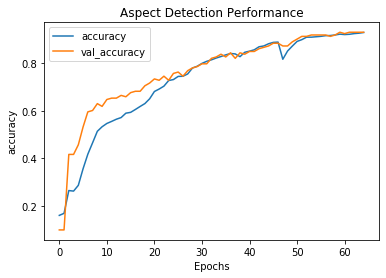

In [30]:
#Performance Visualization - Accuracy for Aspect Categorization 
def plot_graphs1(history1, string):
  plt.plot(history1.history[string])
  plt.plot(history1.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title('Aspect Detection Performance')
  plt.show()

plot_graphs1(history1, 'accuracy')

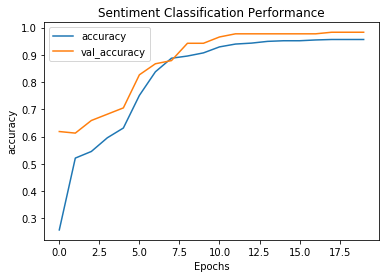

In [31]:
#Performance Visualization - Accuracy for Sentiment Classification 
def plot_graphs2(history2, string):
  plt.plot(history2.history[string])
  plt.plot(history2.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title('Sentiment Classification Performance')
  plt.show()

plot_graphs2(history2, 'accuracy')

### Loss

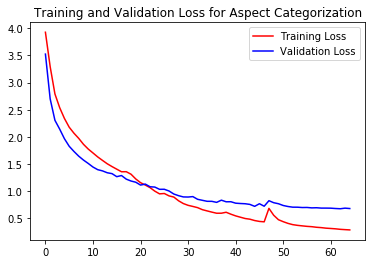

In [36]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss for Aspect Categorization')
plt.legend()

plt.show()

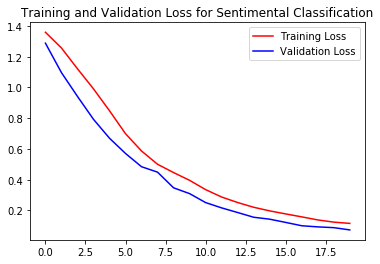

In [37]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss for Sentimental Classification')
plt.legend()

plt.show()

## Test

In [34]:
#Test on single random instance

instance = np.asarray(["I"])
instance = tokenizer.texts_to_sequences(instance)
instance = pad_sequences(instance, padding='post', maxlen=100)

# Predict Aspect
pred_in1 = model1.predict(instance)
aspects_in = pred_in1.argmax(axis=-1)
print(pre1.inverse_transform(aspects_in))

['LAPTOP#DESIGN_FEATURES']


In [35]:
# Predict Sentiment
pred_in2 = model2.predict(instance)
labs_in = pred_in2.argmax(axis=-1)
print(pre2.inverse_transform(labs_in))

['negative']


## Embedding Projection

In [24]:
reverse_word_index = dict([(value, key) for (key, value) in w_i.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(reverse_word_index)

{1: '<OOV>', 2: 'the', 3: 'i', 4: 'it', 5: 'and', 6: 'to', 7: 'a', 8: 'is', 9: 'for', 10: 'of', 11: 'this', 12: 'my', 13: 'have', 14: 'laptop', 15: 'that', 16: 'with', 17: 'computer', 18: 'was', 19: 'not', 20: 'in', 21: 'nan', 22: 'on', 23: 'very', 24: 'but', 25: 'use', 26: 'great', 27: 'had', 28: 'so', 29: 'you', 30: 'has', 31: 'as', 32: 'one', 33: 'all', 34: 'easy', 35: 'me', 36: 'only', 37: 'battery', 38: 'good', 39: 'just', 40: 'bought', 41: 'up', 42: 'be', 43: 'after', 44: 'do', 45: 'are', 46: 'macbook', 47: 'love', 48: 'its', 49: 'well', 50: 'no', 51: 'screen', 52: 'more', 53: 'am', 54: "it's", 55: 'life', 56: 'toshiba', 57: 'like', 58: 'about', 59: 'mac', 60: 'from', 61: 'get', 62: 'than', 63: 'would', 64: 'time', 65: 'really', 66: 'windows', 67: 'first', 68: 'pro', 69: 'or', 70: 'out', 71: 'they', 72: 'everything', 73: 'product', 74: 'price', 75: 'can', 76: 'at', 77: 'any', 78: 'pc', 79: 'work', 80: 'will', 81: '2', 82: 'an', 83: 'quality', 84: 'when', 85: 'months', 86: 'keyboa

In [21]:
e1 = model1.layers[0]
weights1 = e1.get_weights()[0]
print(weights1.shape)

(2100, 24)


In [22]:
e2 = model2.layers[0]
weights2 = e2.get_weights()[0]
print(weights2.shape)

(2100, 8)


In [23]:
import io

out_v = io.open('vecs2.tsv', 'w', encoding='utf-8')
out_m = io.open('meta2.tsv', 'w', encoding='utf-8')
for word_num in range(1, 2090):
    word = reverse_word_index[word_num]
    embeddings = weights2[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [24]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs2.tsv')
    files.download('meta2.tsv')